In [1]:
import matplotlib.pyplot as plt
import numpy as np

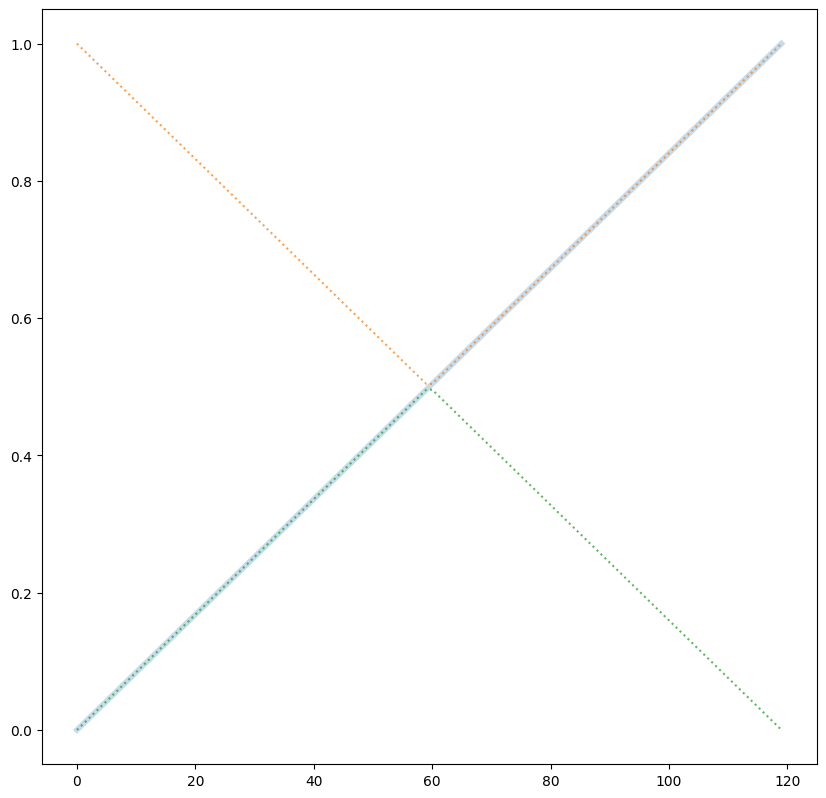

In [212]:
num_bands = 120

eps = 10e-15
x1 = np.linspace(eps, 1 - eps, num=num_bands)
x2 = np.concatenate((x1[::-1][:60], x1[60:]))
x3 = np.concatenate((x1[:60], x1[::-1][60:]))

plt.figure(figsize=(10, 10), dpi=100)
# plt.scatter(np.arange(0, 120), x1, marker=".", fc="none", ec="r", s=6, alpha=0.5);
# plt.scatter(np.arange(0, 120), x2, marker="o", fc="none", ec="b", s=20, alpha=0.75);
# plt.scatter(np.arange(0, 120), x3, marker="o", fc="none", ec="g", s=20, alpha=0.75);
plt.plot(x1, lw=4, alpha=0.25);
plt.plot(x2, ls=":", alpha=0.75);
plt.plot(x3, ls=":", alpha=0.75);

In [228]:
def bce_loss(x, y):
    # return - np.mean(np.clip(y * np.log(x) + (1 - y) * np.log(1 - x), a_min=-100, a_max=10^10))
    return - np.clip(y * np.log(x) + (1 - y) * np.log(1 - x), a_min=-100, a_max=10^10)

def mse_loss(x, y):
    # return np.mean(np.square(x - y))
    return np.square(x - y)

def ecs_loss(x, y):
    return np.sqrt(np.sum((np.square((np.cumsum(x) - np.cumsum(y))))))
    # return np.sqrt(np.square(np.cumsum(x) - np.cumsum(y)))
    # return np.abs(np.cumsum(x) - np.cumsum(y))

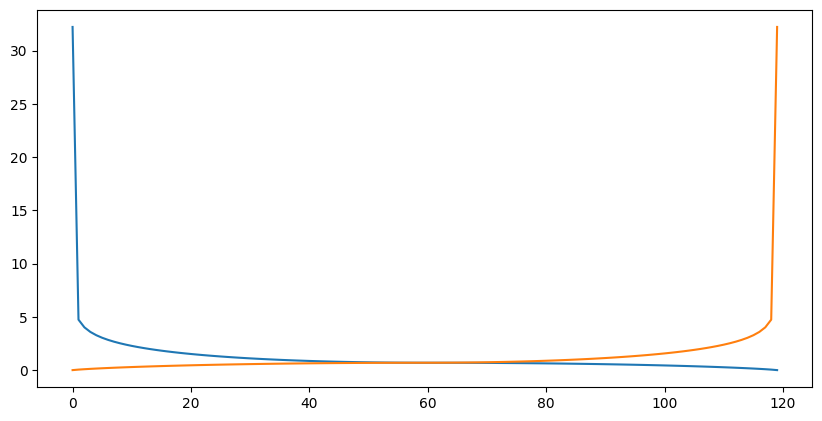

In [213]:
# print(bce_loss(x1, x2))

plt.figure(figsize=(10, 5), dpi=100)
plt.plot(bce_loss(x1, x2));
plt.plot(bce_loss(x1, x3));

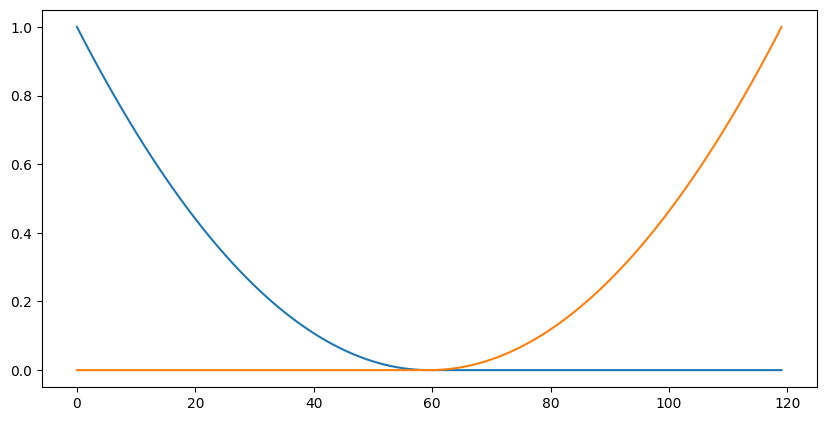

In [214]:
# print(mse_loss(x1, x2))

plt.figure(figsize=(10, 5), dpi=100)
plt.plot(mse_loss(x1, x2));
plt.plot(mse_loss(x1, x3));

In [232]:
print(ecs_loss(x1, x2))
print(ecs_loss(x1, x3))

print(np.mean(mse_loss(x1, x2)))
print(np.mean(mse_loss(x1, x3)))

print(np.mean(bce_loss(x1, x2)))
print(np.mean(bce_loss(x1, x3)))

def kl_loss(x, y):
    return np.sum( x * (np.log(x) - np.log(y)) )

print(kl_loss(x1, x2))
print(kl_loss(x1, x3))

# plt.figure(figsize=(10, 5), dpi=100)
# plt.plot(ecs_loss(x1, x2));
# plt.plot(ecs_loss(x1, x3));

290.9553889254265
106.98109324144974
0.16946778711483912
0.16946778711483912
1.232724922864071
1.232731586175989
-11.488220690639405
99.92608563375812
